In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 20) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Define loss
def log_LMS(x, y):
    return np.log(np.sqrt(np.sum((x-y) * (x-y), axis=1)))

# Define network
def net(w1, w2, b, x1, x2):
    return w1[:, np.newaxis].dot(x1[np.newaxis, :]) + w2[:, np.newaxis].dot(x2[np.newaxis, :]) + b

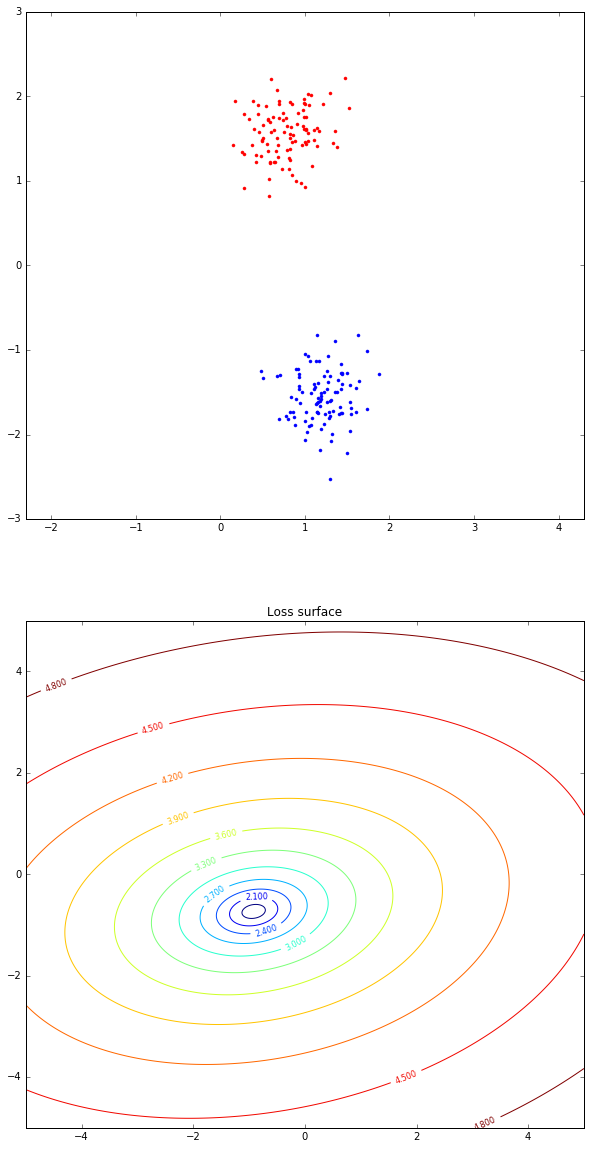

In [12]:
@interact(x1=(-2, 2, 0.1), y1=(-2, 2, 0.1), x2=(-2, 2, 0.1), y2=(-2, 2, 0.1), r1=(0, 1, 0.1), r2=(0, 1, 0.1), continuous_update=False)
def data_visual(x1=-0.8, y1=-1.6, x2=0.8, y2=1.6, r1=0.1, r2=0.1):
    # Data generation
    x1, y1 = np.random.multivariate_normal([x1, y1], [[r1, 0], [0, r1]], 100).T
    x2, y2 = np.random.multivariate_normal([x2, y2], [[r2, 0], [0, r2]], 100).T
    x = np.append(x1, x2)
    y = np.append(y1, y2)
    label = np.append(np.ones(100), np.ones(100) * -1)
    plt.subplot(2, 1, 1)
    # Visual data
    plt.plot(x1, y1, '.', color='blue')
    plt.plot(x2, y2, '.', color='red')
    plt.axis('equal')

    # Generate contour
    plt.subplot(2, 1, 2)
    w1 = np.linspace(-5, 5, 500)
    w2 = np.linspace(-5, 5, 500)
    W1, W2 = np.meshgrid(w1, w2)
    w1 = W1.reshape(np.prod(W1.shape))
    w2 = W2.reshape(np.prod(W2.shape))
    Z = net(w1, w2, 1, x, y)
    loss = log_LMS(Z, label)
    loss = loss.reshape(W1.shape)

    CS = plt.contour(W1, W2, loss, 12)
    plt.clabel(CS, inline=1, fontsize=8)
    plt.title('Loss surface')
    plt.show()